<a href="https://colab.research.google.com/github/HEMA1188/linear-regression_bk/blob/main/medical_cost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv("medical_cost.csv")
df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [3]:
df.tail(10)

,age,sex,bmi,children,smoker,region,charges
1328,23,female,24.225,2,no,northeast,22395.74424
1329,52,male,38.600,2,no,southwest,10325.20600
1330,57,female,25.740,2,no,southeast,12629.16560
1331,23,female,33.400,0,no,southwest,10795.93733
1332,52,female,44.700,3,no,southwest,11411.68500
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500
1337,61,female,29.070,0,yes,northwest,29141.36030


Data Pre Processing

In [4]:
df.duplicated().sum()

1

In [5]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
df.shape

(1338, 7)

In [7]:
df=df.drop_duplicates()
df.shape

(1337, 7)

EDA Process

In [8]:
df.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


In [10]:
df.describe(include='all')

,age,sex,bmi,children,smoker,region,charges
count,1337.000000,1337,1337.000000,1337.000000,1337,1337,1337.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,675,NaN,NaN,1063,364,NaN
mean,39.222139,NaN,30.663452,1.095737,NaN,NaN,13279.121487
std,14.044333,NaN,6.100468,1.205571,NaN,NaN,12110.359656
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.290000,0.000000,NaN,NaN,4746.344000
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9386.161300
75%,51.000000,NaN,34.700000,2.000000,NaN,NaN,16657.717450


In [11]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

age   : Age of Children

sex    : Gender of children

bmi   : Body mass index

Children: count of children

smoker: yes or no

region: specific region

charges : insurance Amount

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


list of Numerical and non numerical columns


In [13]:
non_numeric_columns = df.select_dtypes(exclude=['float64', 'int64']).columns
print("Non-Numeric Columns:", non_numeric_columns)

numeric_column = df.drop(columns=non_numeric_columns)
print("Numeric columns:", numeric_column)

Non-Numeric Columns: Index(['sex', 'smoker', 'region'], dtype='object')
Numeric columns:       age     bmi  children      charges
0      19  27.900         0  16884.92400
1      18  33.770         1   1725.55230
2      28  33.000         3   4449.46200
3      33  22.705         0  21984.47061
4      32  28.880         0   3866.85520
...   ...     ...       ...          ...
1333   50  30.970         3  10600.54830
1334   18  31.920         0   2205.98080
1335   18  36.850         0   1629.83350
1336   21  25.800         0   2007.94500
1337   61  29.070         0  29141.36030

[1337 rows x 4 columns]


In [14]:
df.describe(exclude='number')

,sex,smoker,region
count,1337,1337,1337
unique,2,2,4
top,male,no,southeast
freq,675,1063,364


In [15]:
df['sex'].value_counts()

sex
male      675
female    662
Name: count, dtype: int64

In [16]:
df['smoker'].value_counts()

smoker
no     1063
yes     274
Name: count, dtype: int64

In [17]:
df['region'].value_counts()

region
southeast    364
southwest    325
northwest    324
northeast    324
Name: count, dtype: int64

Data visualization

Histogram

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'bmi'}>],
       [<Axes: title={'center': 'children'}>,
        <Axes: title={'center': 'charges'}>]], dtype=object)

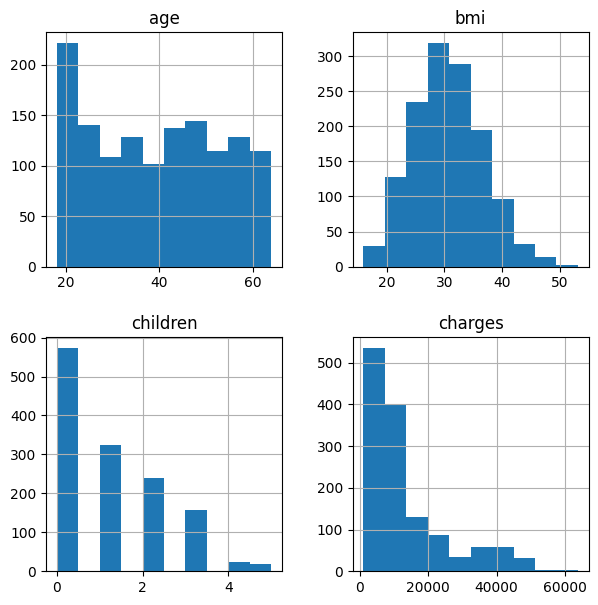

In [19]:
df.hist(figsize=(7, 7))

count plot

<ipython-input-25-39a2c16a5b7c>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sex', data=df, palette='viridis')


Text(24.00000000000002, 0.5, 'Count')

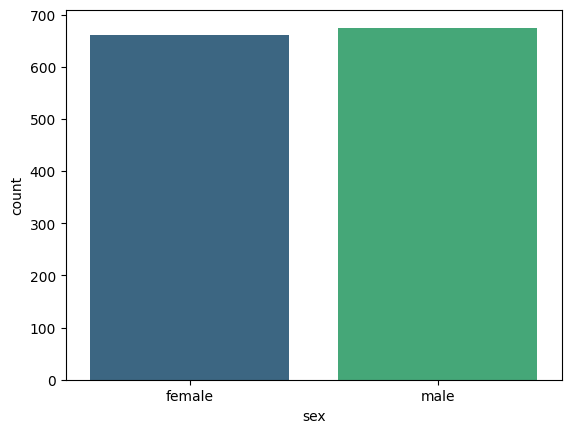

In [25]:


# Plot the distribution of 'SEX'
sns.countplot(x='sex', data=df, palette='viridis')
axes[0].set_title('Distribution of Sex')
axes[0].set_xlabel('SEX')
axes[0].set_ylabel('Count')

<ipython-input-23-87a20040de08>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='smoker', data=df, palette='viridis')


Text(24.00000000000002, 0.5, 'Count')

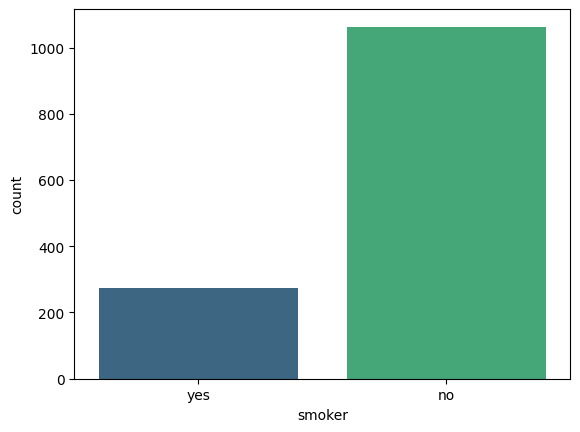

In [23]:
# Plot the distribution of 'Smoker'
sns.countplot(x='smoker', data=df, palette='viridis')
axes[0].set_title('Distribution of Smoker')
axes[0].set_xlabel('Smoker')
axes[0].set_ylabel('Count')

<ipython-input-24-957e704db317>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sex', data=df, palette='viridis')


Text(24.00000000000002, 0.5, 'Count')

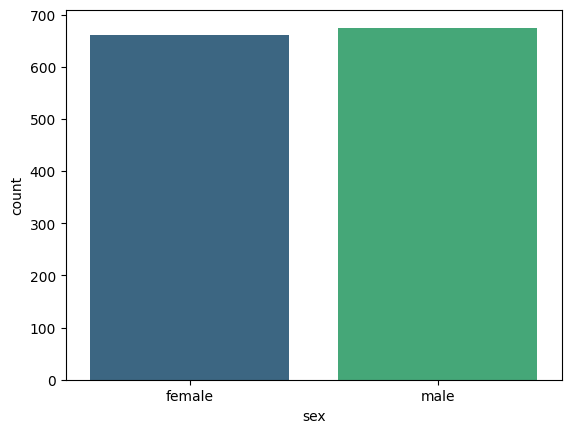

In [24]:
# Plot the distribution of 'Region'
sns.countplot(x='sex', data=df, palette='viridis')
axes[0].set_title('Distribution of Region')
axes[0].set_xlabel('Region')
axes[0].set_ylabel('Count')

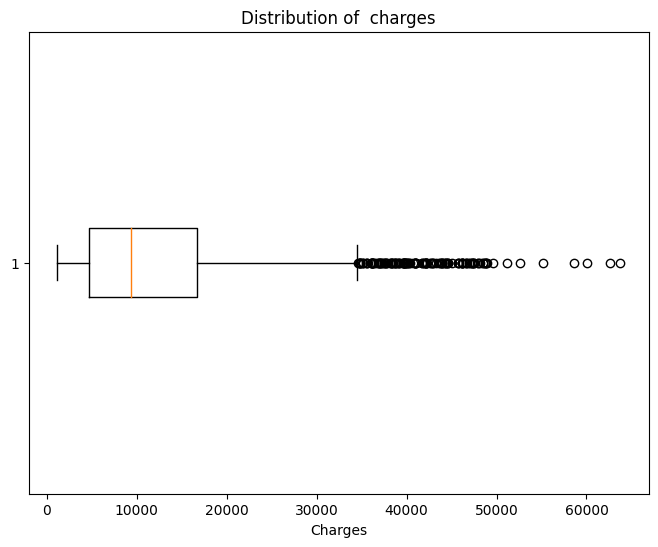

In [22]:

charges = df['charges']

# Create a boxplot
plt.figure(figsize=(8, 6))
plt.boxplot(charges, vert=False)  # vert=False for horizontal boxplot
plt.title('Distribution of  charges')
plt.xlabel('Charges')
plt.show()

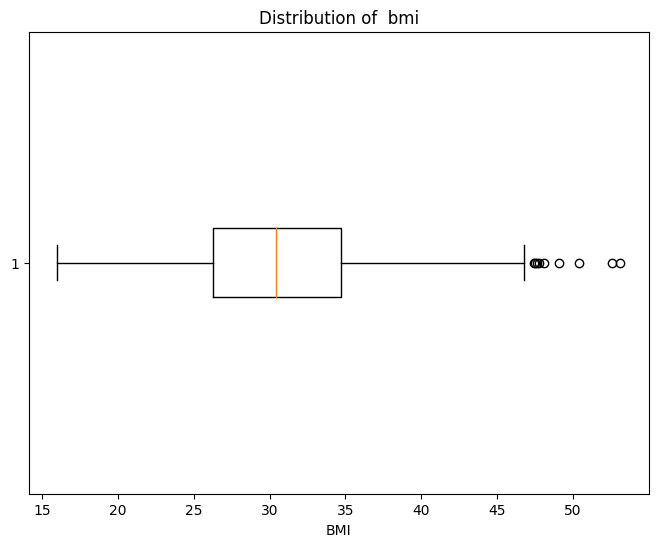

In [26]:
bmi = df['bmi']

# Create a boxplot
plt.figure(figsize=(8, 6))
plt.boxplot(bmi, vert=False)  # vert=False for horizontal boxplot
plt.title('Distribution of  bmi')
plt.xlabel('BMI')
plt.show()

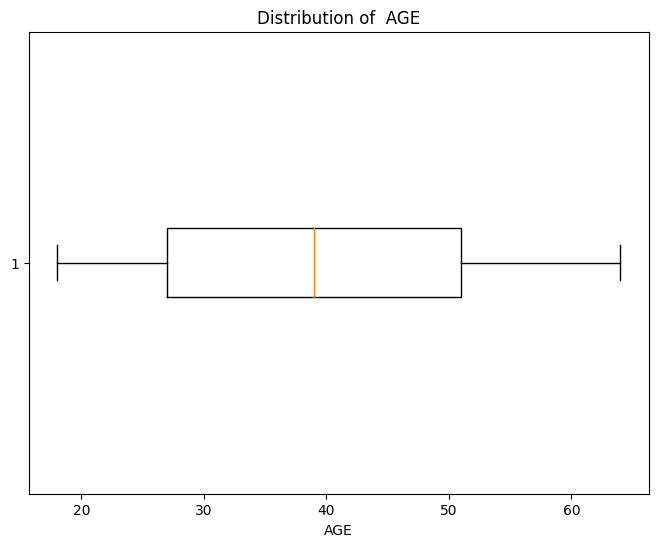

In [28]:
age = df['age']

# Create a boxplot
plt.figure(figsize=(8, 6))
plt.boxplot(age, vert=False)  # vert=False for horizontal boxplot
plt.title('Distribution of  AGE')
plt.xlabel('AGE')
plt.show()

Pie chart

In [29]:
region_count = df['region'].value_counts()
region_count



region
southeast    364
southwest    325
northwest    324
northeast    324
Name: count, dtype: int64

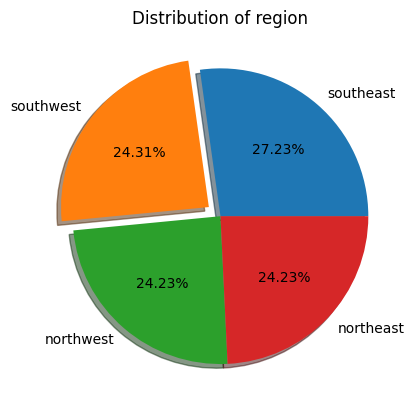

In [31]:
plt.pie(labels=region_count.index,
        x=region_count.values,
        shadow=True,
        autopct='%.2f%%',
        explode=(0,0.1,0,0))
plt.title("Distribution of region")
plt.show()

correlation matrix

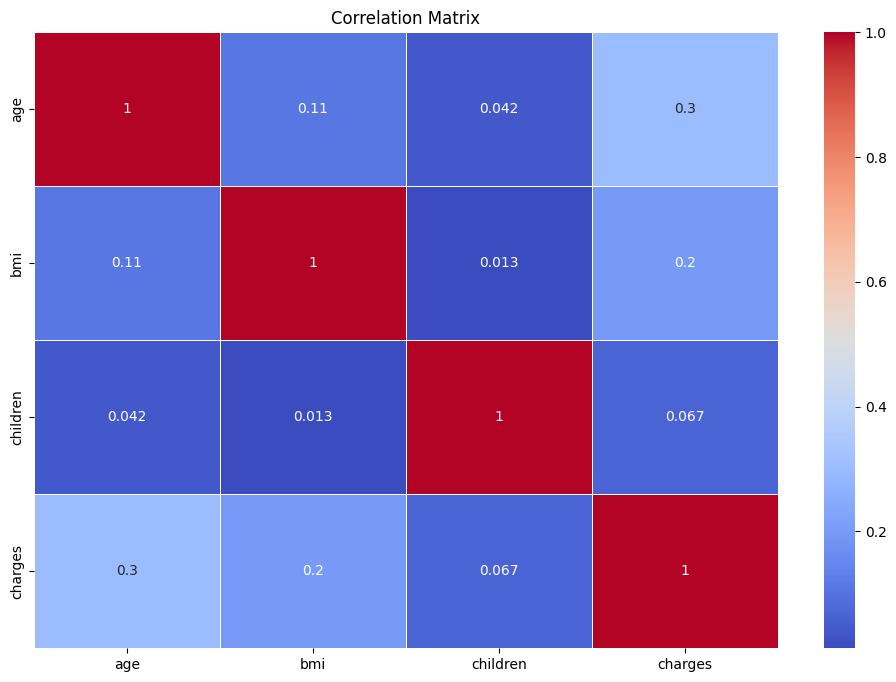

Correlation with Price:
 charges     1.000000
age         0.298308
bmi         0.198401
children    0.067389
Name: charges, dtype: float64


In [32]:
corr_data=df[['age','bmi','children','charges']].corr()

plt.figure(figsize=(12,8))
sns.heatmap(corr_data, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

# Identify features with strong correlation to 'price'
charges_correlation = corr_data['charges'].sort_values(ascending=False)
print("Correlation with Price:\n", charges_correlation)

scatter plot

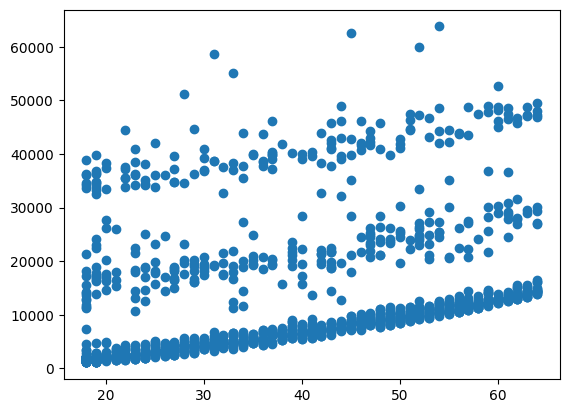

In [33]:
plt.scatter(data=df, x='age',y='charges')

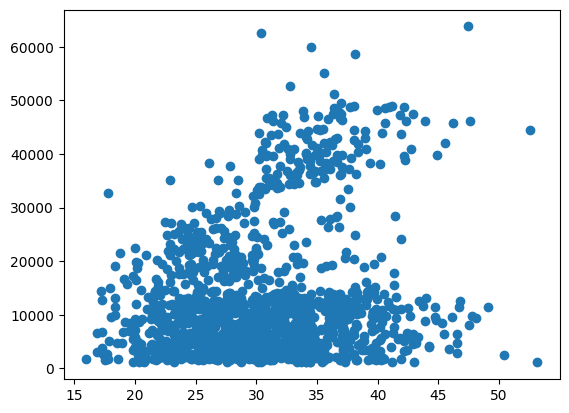

In [34]:
plt.scatter(data=df, x='bmi',y='charges')

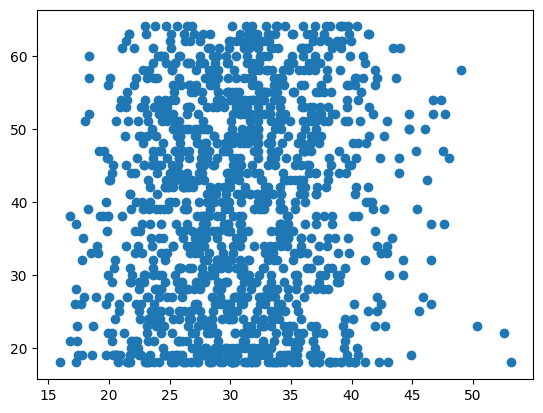

In [35]:
plt.scatter(data=df, x='bmi',y='age')

Label encoding

In [36]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

df['sex']=le.fit_transform(df['sex'])
df['smoker']=le.fit_transform(df['smoker'])
df['region']=le.fit_transform(df['region'])

Model selection

In [37]:
X=df.drop(['charges'], axis=1)
y=df['charges']

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [47]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42,shuffle=True)

In [41]:
X

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,3
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,1
4,32,1,28.880,0,0,1
...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1
1334,18,0,31.920,0,0,0
1335,18,0,36.850,0,0,2
1336,21,0,25.800,0,0,3


In [42]:
from sklearn.preprocessing import StandardScaler

std_scaler=StandardScaler()

X['age']=std_scaler.fit_transform(np.array(X['age']).reshape(-1,1))

X['bmi']=std_scaler.fit_transform(np.array(X['bmi']).reshape(-1,1))

X['children']=std_scaler.fit_transform(np.array(X['children']).reshape(-1,1))

In [43]:
X

,age,sex,bmi,children,smoker,region
0,-1.440418,0,-0.453160,-0.909234,1,3
1,-1.511647,1,0.509422,-0.079442,0,2
2,-0.799350,1,0.383155,1.580143,0,2
3,-0.443201,1,-1.305052,-0.909234,0,1
4,-0.514431,1,-0.292456,-0.909234,0,1
...,...,...,...,...,...,...
1333,0.767704,1,0.050269,1.580143,0,1
1334,-1.511647,0,0.206053,-0.909234,0,0
1335,-1.511647,0,1.014490,-0.909234,0,2
1336,-1.297958,0,-0.797524,-0.909234,0,3


In [44]:
reg=LinearRegression()

In [45]:
reg.fit(X_train,y_train)

LinearRegression()

In [48]:
y_pred = reg.predict(X_test)
rmse   = np.sqrt(mean_squared_error(y_test,y_pred))
print('Training Score: ', reg.score(X_train, y_train))
print('Testing Score: ', reg.score(X_test, y_test))
print('RMSE: ',rmse)

Training Score:  -2.2636548444461617
Testing Score:  -1.5879521241770322
RMSE:  21807.152410747578


In [49]:
from sklearn.model_selection import cross_val_score, cross_validate

In [50]:
result= cross_validate(reg,X,y, cv=5, return_train_score=True, scoring='r2')
result

{'fit_time': array([0.02531338, 0.02478647, 0.02110147, 0.01875949, 0.0060823 ]),
 'score_time': array([0.02010202, 0.01296854, 0.01080418, 0.0106554 , 0.00298023]),
 'test_score': array([0.76123487, 0.70840689, 0.77720769, 0.73365562, 0.7551376 ]),
 'train_score': array([0.74737531, 0.75930033, 0.74326474, 0.75468466, 0.74915469])}

In [51]:
train_acc=result['train_score'].mean()*100
print("Training Accuracy =",train_acc)

Training Accuracy = 75.07559465098191


In [52]:
test_acc=result['test_score'].mean()*100
print("Training Accuracy =",test_acc)

Training Accuracy = 74.71285330088385
